# Week 7
### Exercise: Implement the K-Nearest Neighbors (KNN) model using a different dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


%matplotlib inline

In [2]:
df = pd.read_csv('data/adult.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df["income"].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

## Data Viz

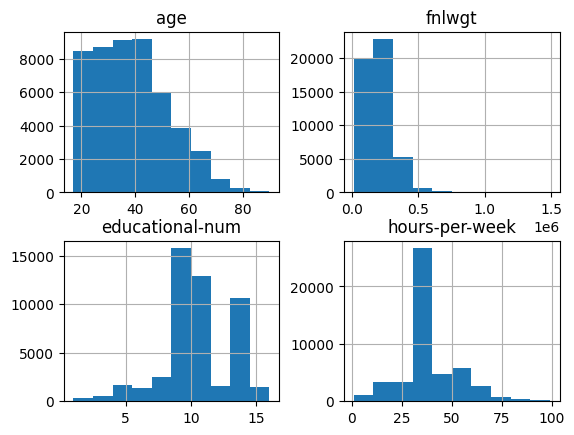

In [6]:
viz = df[['age','fnlwgt','educational-num', 'hours-per-week']]
viz.hist()
plt.show()

<Axes: xlabel='age', ylabel='fnlwgt'>

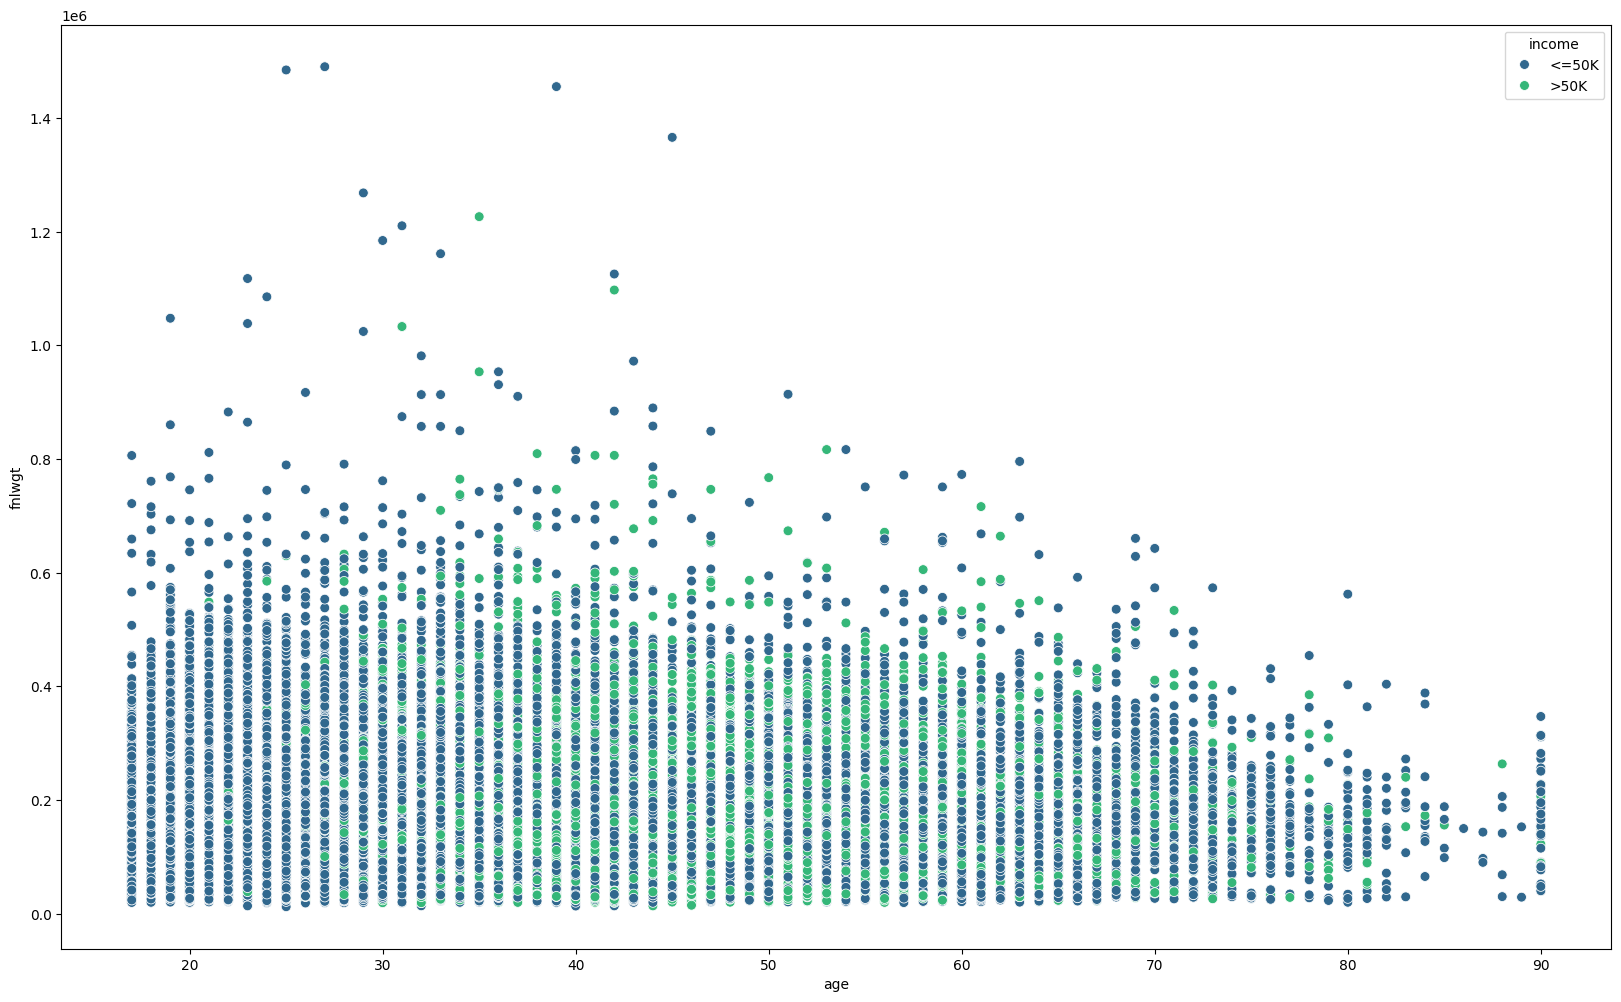

In [8]:
plt.figure(figsize=(20, 12))
sns.scatterplot(x='age', y='fnlwgt', hue='income', data=df, palette='viridis', s=50)

In [24]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

# Train/Test Split

In [9]:
X_train, X_test,y_train, y_test = train_test_split(df[['age','fnlwgt','educational-num', 'hours-per-week']],
									df['income'],
									test_size=0.20)

In [10]:
X_train[0:5]

,age,fnlwgt,educational-num,hours-per-week
37278,36,305714,9,70
17718,36,218542,12,40
35266,45,93535,14,40
28010,19,158118,9,40
30966,36,110998,14,40


# Normalize

In [11]:
from sklearn import preprocessing

# Normalize Data
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train.astype(float))
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))

In [12]:
X_train[0:5]

array([[-0.19205605,  1.09741132, -0.42013131,  2.38585332],
       [-0.19205605,  0.27383639,  0.74830782, -0.03200879],
       [ 0.46291363, -0.90719227,  1.52726723, -0.03200879],
       [-1.429221  , -0.29703145, -0.42013131, -0.03200879],
       [-0.19205605, -0.74220708,  1.52726723, -0.03200879]])

In [13]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (39073, 4) (39073,)
Test set: (9769, 4) (9769,)


# Classification

In [15]:
k = 4
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)

In [16]:
neigh

KNeighborsClassifier(n_neighbors=4)

# Prediction

In [17]:
pred = neigh.predict(X_test)
pred[0:5]

array(['<=50K', '<=50K', '<=50K', '<=50K', '<=50K'], dtype=object)

# Accuracy Evaulation

In [25]:
print(f"Train set accuracy:{accuracy_score(y_train, neigh.predict(X_train)):.2f}")
print(f"Test set accuracy: {accuracy_score(y_test, pred):.2f}")

Train set accuracy:0.84
Test set accuracy: 0.77


# Find the best k value

In [29]:
K_MAX= 20

mean_acc = np.zeros((K_MAX-1))
std_acc = np.zeros((K_MAX-1))

for n in range(1, K_MAX):
    # train and prediction for each k
    classifier = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    pred = classifier.predict(X_test)
    mean_acc[n-1] = accuracy_score(y_test, pred)
    std_acc[n-1] = np.std(pred==y_test)/np.sqrt(pred.shape[0])

In [30]:
mean_acc

array([0.72566281, 0.76660866, 0.75964787, 0.7745931 , 0.76578974,
       0.77715222, 0.77070324, 0.77971133, 0.77838059, 0.78308936,
       0.782987  , 0.78329409, 0.78042788, 0.78360119, 0.78380592,
       0.78687686, 0.78636503, 0.78738868, 0.78718395])

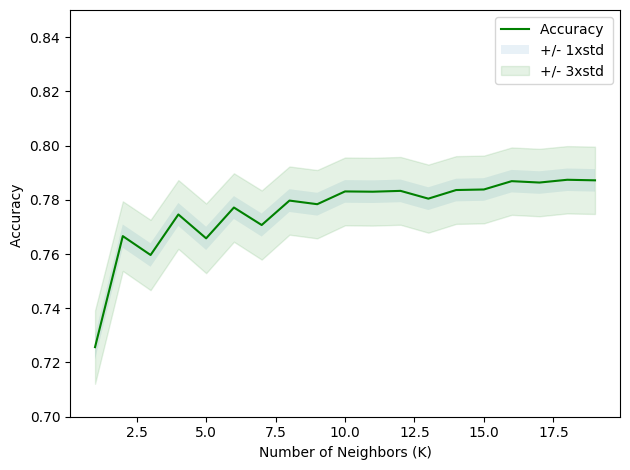

In [45]:
plt.plot(range(1,K_MAX),mean_acc,'g')
plt.fill_between(range(1,K_MAX),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,K_MAX),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.ylim(0.70,0.85)
plt.show()

In [34]:
print( "The best accuracy", round(mean_acc.max(),2), "with k=", mean_acc.argmax()+1) 

The best accuracy 0.79 with k= 18
